## Gender Classification Of Names
### Using Machine Learning To Detect/Predict Gender of Individuals 
+ Sklearn
+ Pandas
+ Text Extraction

In [234]:
# packages
import pandas as pd
import numpy as np

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [235]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer


In [236]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [237]:
# Load our data
namesDataDF = pd.read_csv('ML_Train_names_dataset.csv')

In [238]:
namesDataDF.shape

(95025, 3)

In [239]:
print('Percentage of Female in this dataset is :', round(100 * namesDataDF['sex'].value_counts()[0]/namesDataDF['sex'].value_counts().sum(),2))
print('Percentage of Male in this dataset is :', round(100 * namesDataDF['sex'].value_counts()[1]/namesDataDF['sex'].value_counts().sum(),2))

Percentage of Female in this dataset is : 63.77
Percentage of Male in this dataset is : 36.23


## Data Cleaning

In [7]:
# Checking for column name consistency
namesDataDF.columns

Index(['index', 'name', 'sex'], dtype='object')

In [8]:
# Data Types
namesDataDF.dtypes

index     int64
name     object
sex      object
dtype: object

In [9]:
# Checking for Missing Values
namesDataDF.isnull().isnull().sum()

index    0
name     0
sex      0
dtype: int64

In [10]:
namesDataDF['sex'].value_counts()

F    60597
M    34428
Name: sex, dtype: int64

In [11]:
df_names = namesDataDF

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_names['sex'] = le.fit_transform(df_names['sex'])

In [13]:
df_names['sex'].value_counts()

0    60597
1    34428
Name: sex, dtype: int64

In [14]:
# # Replacing All F and M with 0 and 1 respectively
# df_names.sex.replace({'F':0,'M':1},inplace=True)

In [15]:
df_names.dtypes

index     int64
name     object
sex       int32
dtype: object

In [16]:
Xfeatures = df_names['name']

### Feature Extraction 

In [17]:
# Feature Extraction 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [18]:
type(X)

scipy.sparse.csr.csr_matrix

In [19]:
cv.get_feature_names()[:5]

['aaban', 'aabha', 'aabid', 'aabriella', 'aada']

In [20]:
len(cv.get_feature_names())

95025

# Training the Naives Bayes Classifier model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
# Features 
X
# Labels
y = df_names.sex

In [23]:
y.value_counts()

0    60597
1    34428
Name: sex, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [25]:
print('After Stratification:')

# Whole Dataset
print('\nPercentage of Female in this dataset is :', round(100 * y.value_counts()[0]/y.value_counts().sum(),2))
print('Percentage of Male in this dataset is :', round(100 * y.value_counts()[1]/y.value_counts().sum(),2))


# Training Dataset
print('\nPercentage of Female in this training dataset is :', round(100 * y_train.value_counts()[0]/y_train.value_counts().sum(),2))
print('Percentage of Male in this training dataset is :', round(100 * y_train.value_counts()[1]/y_train.value_counts().sum(),2))


# Testing Dataset
print('\nPercentage of Female in this testing dataset is :', round(100 * y_test.value_counts()[0]/y_test.value_counts().sum(),2))
print('Percentage of Male in this testing dataset is :', round(100 * y_test.value_counts()[1]/y_test.value_counts().sum(),2))

After Stratification:

Percentage of Female in this dataset is : 63.77
Percentage of Male in this dataset is : 36.23

Percentage of Female in this training dataset is : 63.77
Percentage of Male in this training dataset is : 36.23

Percentage of Female in this testing dataset is : 63.77
Percentage of Male in this testing dataset is : 36.23


******Before Stratification:******

Percentage of Female in this dataset is : 63.77<br>
Percentage of Male in this dataset is : 36.23

Percentage of Female in this training dataset is : 63.67<br>
Percentage of Male in this training dataset is : 36.33

Percentage of Female in this test dataset is : 64.18<br>
Percentage of Male in this test dataset is : 35.82

In [26]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 1,fit_prior= True)
clf

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [27]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6376742962378321

In [28]:
# Training Accuracy of our Model
print("Training Accuracy of Model",round(clf.score(X_train,y_train)*100,2),"%")

Training Accuracy of Model 100.0 %


In [29]:
# Testing Accuracy of our Model
print("Testing Accuracy of Model", round(clf.score(X_test,y_test)*100,2),"%")

Testing Accuracy of Model 63.77 %


### Performance metrics

In [30]:
y_pred = clf.predict(X_test)

In [31]:
labelClass = [0,1]

In [32]:
print("\nClassification Report\n")
print(classification_report(y_test, y_pred))



Classification Report

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     12119
           1       0.00      0.00      0.00      6886

    accuracy                           0.64     19005
   macro avg       0.32      0.50      0.39     19005
weighted avg       0.41      0.64      0.50     19005



C:\Users\yuvar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred,labels= labelClass )

Confusion matrix, without normalization
[[12119     0]
 [ 6886     0]]


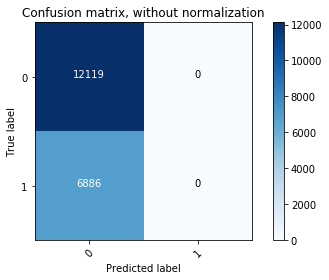

In [34]:
plot_confusion_matrix(cnf_matrix, classes= labelClass,
                  title='Confusion matrix, without normalization')

### Sample Prediction of Naives Bayes Classifier

In [35]:
X

<95025x95025 sparse matrix of type '<class 'numpy.int64'>'
	with 95025 stored elements in Compressed Sparse Row format>

In [36]:
# A function to do it
def genderpredictor_naives(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    if clf.predict(vector) == 0:
        print("Female")
    else:
        print("Male")
    

In [37]:
genderpredictor_naives("Martha")

Female


Features fxn
apply the fxn
vectorizer
fit
transform
classifier
fit
predict


In [38]:
namelist = ["Yaa","Yaw","Femi","Masha"]
for i in namelist:
    print(genderpredictor_naives(i))

Female
None
Male
None
Female
None
Female
None


### Using a custom function for feature analysis

In [39]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

In [40]:
# Vectorize the features function
features = np.vectorize(features)
print(features(["Anna", "Hannah", "Peter","John","Vladmir","Mohammed"]))

[{'first-letter': 'a', 'first2-letters': 'an', 'first3-letters': 'ann', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'nna'}
 {'first-letter': 'h', 'first2-letters': 'ha', 'first3-letters': 'han', 'last-letter': 'h', 'last2-letters': 'ah', 'last3-letters': 'nah'}
 {'first-letter': 'p', 'first2-letters': 'pe', 'first3-letters': 'pet', 'last-letter': 'r', 'last2-letters': 'er', 'last3-letters': 'ter'}
 {'first-letter': 'j', 'first2-letters': 'jo', 'first3-letters': 'joh', 'last-letter': 'n', 'last2-letters': 'hn', 'last3-letters': 'ohn'}
 {'first-letter': 'v', 'first2-letters': 'vl', 'first3-letters': 'vla', 'last-letter': 'r', 'last2-letters': 'ir', 'last3-letters': 'mir'}
 {'first-letter': 'm', 'first2-letters': 'mo', 'first3-letters': 'moh', 'last-letter': 'd', 'last2-letters': 'ed', 'last3-letters': 'med'}]


In [41]:
# Extract the features for the dataset
df_X = features(df_names['name'])

In [42]:
df_y = df_names['sex']

In [43]:
#Example from scikit-learn

from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X_dict = v.fit_transform(D)
X_dict

array([[2., 0., 1.],
       [0., 1., 3.]])

In [44]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["Mike", "Julia"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
print(transformed)
 

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 11)	1.0


In [45]:
dv.get_feature_names()

['first-letter=j',
 'first-letter=m',
 'first2-letters=ju',
 'first2-letters=mi',
 'first3-letters=jul',
 'first3-letters=mik',
 'last-letter=a',
 'last-letter=e',
 'last2-letters=ia',
 'last2-letters=ke',
 'last3-letters=ike',
 'last3-letters=lia']

In [46]:
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.20, random_state= 42 , stratify = df_y)
# dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.20, random_state= 42)

In [47]:
print('After Stratification:')

# Whole Dataset
print('\nPercentage of Female in this dataset is :', round(100 * df_y.value_counts()[0]/df_y.value_counts().sum(),2))
print('Percentage of Male in this dataset is :', round(100 * df_y.value_counts()[1]/df_y.value_counts().sum(),2))


# Training Dataset
print('\nPercentage of Female in this training dataset is :', round(100 * dfy_train.value_counts()[0]/dfy_train.value_counts().sum(),2))
print('Percentage of Male in this training dataset is :', round(100 * dfy_train.value_counts()[1]/dfy_train.value_counts().sum(),2))


# Testing Dataset
print('\nPercentage of Female in this testing dataset is :', round(100 * dfy_test.value_counts()[0]/dfy_test.value_counts().sum(),2))
print('Percentage of Male in this testing dataset is :', round(100 * dfy_test.value_counts()[1]/dfy_test.value_counts().sum(),2))

After Stratification:

Percentage of Female in this dataset is : 63.77
Percentage of Male in this dataset is : 36.23

Percentage of Female in this training dataset is : 63.77
Percentage of Male in this training dataset is : 36.23

Percentage of Female in this testing dataset is : 63.77
Percentage of Male in this testing dataset is : 36.23


In [48]:
dfX_train.shape , dfy_train.shape

((76020,), (76020,))

In [49]:
dfX_test.shape , dfy_test.shape

((19005,), (19005,))

In [50]:
dfX_train[:5]

array([{'first-letter': 's', 'first2-letters': 'sh', 'first3-letters': 'sha', 'last-letter': 'a', 'last2-letters': 'ia', 'last3-letters': 'lia'},
       {'first-letter': 'b', 'first2-letters': 'ba', 'first3-letters': 'bal', 'last-letter': 'o', 'last2-letters': 'do', 'last3-letters': 'ldo'},
       {'first-letter': 'p', 'first2-letters': 'ph', 'first3-letters': 'phu', 'last-letter': 'g', 'last2-letters': 'ng', 'last3-letters': 'ong'},
       {'first-letter': 'r', 'first2-letters': 're', 'first3-letters': 'reg', 'last-letter': 'l', 'last2-letters': 'al', 'last3-letters': 'nal'},
       {'first-letter': 'w', 'first2-letters': 'wi', 'first3-letters': 'wil', 'last-letter': 'a', 'last2-letters': 'da', 'last3-letters': 'lda'}],
      dtype=object)

# Decision Tree Classifier

In [51]:
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<76020x8566 sparse matrix of type '<class 'numpy.float64'>'
	with 456120 stored elements in Compressed Sparse Row format>

### Model building Using DecisionTree : Reproducibility enabled with random_state and balanced the class weights

In [52]:
# Model building Using DecisionTree

from sklearn.tree import DecisionTreeClassifier
 
# dclf = DecisionTreeClassifier(random_state= 42)
dclf = DecisionTreeClassifier(random_state= 42,class_weight = 'balanced')

my_xfeatures =dv.transform(dfX_train)
dclf.fit(my_xfeatures, dfy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
# A function to predict Gender
def genderpredictor_decision_tree(a):
    test_name1 = [a]
    transform_dv =dv.transform(features(test_name1))
    #print(transform_dv)
    vector = transform_dv.toarray()
    if dclf.predict(vector) == 0:
        return "Female"
    else:
        return "Male"
    

In [54]:
genderpredictor_decision_tree('seung-hyun')

'Male'

In [55]:
random_name_list = ["Alex","Alice","Chioma","Vitalic","Clairese","Chan","George"]

In [56]:
for n in random_name_list:
    print(genderpredictor_decision_tree(n))

Male
Female
Female
Male
Female
Male
Male


In [57]:
## Accuracy of Models Decision Tree Classifier Works better than Naive Bayes
# Accuracy on training set
print("The train score of the decision tree is : ", dclf.score(dv.transform(dfX_train), dfy_train))

The train score of the decision tree is :  0.9871349644830307


In [58]:
# Accuracy on test set
print("The test score of the decision tree is : ", dclf.score(dv.transform(dfX_test), dfy_test))

The test score of the decision tree is :  0.8683504340962904


In [59]:
my_dfX_testfeatures =dv.transform(dfX_test)

In [60]:
y_pred = dclf.predict(my_dfX_testfeatures)

In [61]:
labelClass = [0,1]

In [62]:
print("\nClassification Report\n")
print(classification_report(dfy_test, y_pred))



Classification Report

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12119
           1       0.81      0.84      0.82      6886

    accuracy                           0.87     19005
   macro avg       0.86      0.86      0.86     19005
weighted avg       0.87      0.87      0.87     19005



In [63]:
cnf_matrix = confusion_matrix(dfy_test, y_pred,labels= labelClass )

Confusion matrix, without normalization
[[10726  1393]
 [ 1109  5777]]


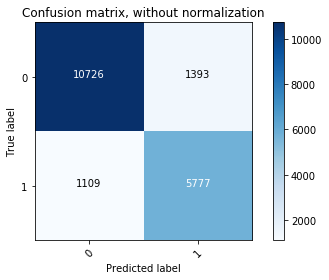

In [64]:
plot_confusion_matrix(cnf_matrix, classes= labelClass,
                  title='Confusion matrix, without normalization')

### Saving Our Model

In [65]:
from sklearn.externals import joblib

C:\Users\yuvar\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [66]:
# from sklearn.externals import joblib

# # decisiontreModel = open("decisiontreemodel.pkl","wb")
# decisiontreModel = open(".\\model\\decisiontreemodel.pkl","wb")

# joblib.dump(dclf,decisiontreModel)

# decisiontreModel.close

In [67]:
#Alternative to Model Saving
import pickle
# dctreeModel = open("namesdetectormodel.pkl","wb")
dctreeModel = open(".\\Save model\\dclf_namesgender_model.pkl","wb")

pickle.dump(dclf,dctreeModel)

dctreeModel.close()

##### Save Multinomial NB Model

In [68]:
# NaiveBayesModel = open("naivebayesgendermodel.pkl","wb")
MultinomialNaiveBayesModel = open(".\\Save model\\MultinomialNaiveBayes_namesgender_model.pkl","wb")

In [69]:
joblib.dump(clf,MultinomialNaiveBayesModel)

In [70]:
MultinomialNaiveBayesModel.close()

ML model Code Reference
By Jesse JCharis

# Genderize the Exploded Dataset

In [71]:
from dateutil.parser import parse 
import numpy as np
import pandas as pd
import unicodedata
from datetime import datetime
from datetime import date

In [72]:
# Helper method for save_to_file

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [73]:
# Function: Save Dataframe to CSV

def save_to_file(dataFrame, folderPath):
    today = date.today()
    todayDate = today.strftime("%b-%d-%Y")
#     dataFrame.to_csv(folderPath+ '\\' + get_df_name(dataFrame) + '_' + todayDate  + '.csv',index=False, encoding="utf8" )
    dataFrame.to_csv(folderPath+ '\\' + get_df_name(dataFrame) + '_' + todayDate  + '.csv',index=False, encoding="utf-8-sig" )

In [74]:
fileLocation = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\CleaningStage\\stage2ExplodeAndMergeDF_Apr-15-2020.csv"
saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\CleaningStage"

In [75]:
# Import as Dataframe - check later
dfGenderlessData = pd.read_csv(fileLocation,encoding="utf8")

C:\Users\yuvar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
print('Dataframe shape is : ', dfGenderlessData.shape)
dfGenderlessData.head()

Dataframe shape is :  (798861, 130)


,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,...,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt0308254,tt1428455",0,1,0,4,5.75
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,0,None,6.5,148,1892-10-28,...,Émile Reynaud,1844,1918,director,"tt0413219,tt2184231,tt2184201,tt0000003,tt0000...",1,0,0,6,6.17
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,...,Émile Reynaud,1844,1918,director,"tt0413219,tt2184231,tt2184201,tt0000003,tt0000...",1,0,0,6,6.17
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,0,None,6.6,90,1892-10-28,...,Émile Reynaud,1844,1918,director,"tt0413219,tt2184231,tt2184201,tt0000003,tt0000...",1,0,0,6,6.17
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,...,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt0308254,tt1428455",0,1,0,4,5.75


In [77]:
# # The record which had only one of its directors in the end
# dfGenderlessData[dfGenderlessData['movie_id'] == 'tt1355638']

# Cleaning the director names before predicting the Gender

## Convert the names to a english readable sentence as few of them contain special characters

In [78]:
# Found directors containing digits and replaced them with the real names
replace_digits_with_real_director_names = {'D3': 'Dennis Wood',
                                           '1312':'BR',
                                           '50 Cent':'Curtis James Jackson',
                                           'ZZalgern0n':'Zzalgernon',
                                           'Mk12':'Matt Fraction',
                                           'One9':'Erik Parker',
                                           'K8 Hardy': 'Kaight Hardy',
                                           'Ryukishi07':'Ryūkishi Zero-Nana',
                                           'Bros400 1929':'Yuji Naka',
                                           'Revenger123':'McQuackerston',
                                           'TheWraith517':'Robert Goodwin'
                                          }

In [79]:
dfGenderlessData['director_names'] = dfGenderlessData['director_names'].str.strip()

In [80]:
dfGenderlessData['director_names'] = dfGenderlessData['director_names'].replace(replace_digits_with_real_director_names)

In [81]:
# The names contain special characters. This function converts the special characters to normal characters

def specialCharacterConversion(name):
    text = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode("utf-8").lower() 
    return text

In [82]:
dfGenderlessData['clean_director_names'] = dfGenderlessData['director_names'].apply(specialCharacterConversion)

## Clear Salutations such as Mr. and Dr. and Jr.

In [83]:
# The condition to identify salutation is two letters with a dot

condition_for_salutations = dfGenderlessData['clean_director_names'].astype(str).str[2:3].str.contains('\.')
condition_for_salutations.sum()

62

In [84]:
dfGenderlessData[condition_for_salutations].head(2)

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,birthYear,deathYear,primaryProfession,knownForTitles,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names
16910,nm7834509,Ya. Avdeenko,tt0035702,La bataille d'Ukraine (1943) - IMDb,3,0,None,7.7,65,1945-03-14,...,\N,\N,"director,actor",tt0035702,1,0,0,1,7.7,ya. avdeenko
21050,nm0167282,St. John Legh Clowes,tt0040647,No Orchids for Miss Blandish (1948) - IMDb,24,9,None,6.1,361,1948-04-15,...,1907,1951,"writer,director,producer","tt0025197,tt3902866,tt0039897,tt0040647,tt0025...",0,1,0,4,5.4,st. john legh clowes


In [85]:
dynamic_salutation_like_list = dfGenderlessData['director_names'][condition_for_salutations]\
                                                            .astype(str)\
                                                            .str[0:2].str.strip().unique().tolist()
dynamic_salutation_like_list

['Ya', 'St', 'Ed', 'Mr', 'Dr', 'Ms', 'Md', 'Wm', 'Vl', 'Pa']

## Clear all salutations replaced with empty spaces

#### Function to clear salutations

In [86]:
def clear_salutations(df = dfGenderlessData,columnName = 'clean_director_names' ,salutation = 'Dr'):
    
    # Add . to the salutation
    check_salutation = salutation.lower() + '\.'
    
    # Condition to check for the salutation in the column
    condition_before = df[columnName].str.contains(check_salutation)
    
    # Prepare the clean director names by replacing the salutations with empty space. Example ; "Dr. Sam" as "Sam"
    cleaned_salutations = df[columnName][condition_before].str.replace(check_salutation,'').str.strip()
    print("\nThe number of records which had '{0}' salutation in it before the cleaning : {1}".format(salutation, condition_before.sum()))
    
    # Replace the cleaned records back to the corresponding value
    df.loc[condition_before, columnName] = cleaned_salutations
    
    # Recheck
    condition_after = df[columnName].str.contains(check_salutation)
    print("The number of records which had '{0}' salutation in it after the cleaning : {1}".format(salutation, condition_after.sum()))

In [87]:
for salutation in dynamic_salutation_like_list:
    clear_salutations(df = dfGenderlessData,columnName = 'clean_director_names' ,salutation = salutation)


The number of records which had 'Ya' salutation in it before the cleaning : 2
The number of records which had 'Ya' salutation in it after the cleaning : 0

The number of records which had 'St' salutation in it before the cleaning : 139
The number of records which had 'St' salutation in it after the cleaning : 0

The number of records which had 'Ed' salutation in it before the cleaning : 12
The number of records which had 'Ed' salutation in it after the cleaning : 0

The number of records which had 'Mr' salutation in it before the cleaning : 19
The number of records which had 'Mr' salutation in it after the cleaning : 0

The number of records which had 'Dr' salutation in it before the cleaning : 13
The number of records which had 'Dr' salutation in it after the cleaning : 0

The number of records which had 'Ms' salutation in it before the cleaning : 1
The number of records which had 'Ms' salutation in it after the cleaning : 0

The number of records which had 'Md' salutation in it befo

In [88]:
def clear_mrs_salutations(df = dfGenderlessData,columnName = 'clean_director_names' ,salutation = 'Mrs'):
    
    # Add . to the salutation
    check_salutation = salutation.lower() + '\.'
    
    # Condition to check for the salutation in the column
    condition_before = df[columnName].str.contains(check_salutation)
    
    # Prepare the clean director names by replacing the salutations with empty space. Example ; "Dr. Sam" as "Sam"
    cleaned_salutations = df[columnName][condition_before].str.replace(check_salutation,'').str.strip().str[0]
    print("\nThe number of records which had '{0}' salutation in it before the cleaning : {1}".format(salutation, condition_before.sum()))
    
    # Replace the cleaned records back to the corresponding value
    df.loc[condition_before, columnName] = cleaned_salutations
    
    # Recheck
    condition_after = df[columnName].str.contains(check_salutation)
    print("The number of records which had '{0}' salutation in it after the cleaning : {1}".format(salutation, condition_after.sum()))

In [89]:
clear_mrs_salutations(df = dfGenderlessData,columnName = 'clean_director_names' ,salutation = 'Mrs')


The number of records which had 'Mrs' salutation in it before the cleaning : 1
The number of records which had 'Mrs' salutation in it after the cleaning : 0


In [90]:
print('Dataframe shape is : ', dfGenderlessData.shape)

Dataframe shape is :  (798861, 131)


## Find initials

### Maximum initials in the director name column

In [91]:
max_dots_in_a_name = dfGenderlessData['director_names'].str.count("\.").max()
max_dots_in_a_name

3

### Function to clear the intials with 3 dots as that is the max detected

In [92]:
def clear_initials(df = dfGenderlessData, columnName = 'clean_director_names'):
    for round_number in range(max_dots_in_a_name):
        condition_dots_in_first_two_letters = df[columnName].astype(str).str[0:2].str.contains('\.')
        print('\nIdentified records having dots in the first two letters : ', condition_dots_in_first_two_letters.sum())
        starting2letters_dots = df[columnName][condition_dots_in_first_two_letters]
        cleaned_starting2letters_dots_director_names = starting2letters_dots.str.split(pat = '.', n = 1, expand = False).str[1]
        df.loc[condition_dots_in_first_two_letters, columnName] = cleaned_starting2letters_dots_director_names
        print('Round {0} done'.format(round_number+1))
    records_left_condtion = df[columnName].astype(str).str[0:2].str.contains('\.')
    print('\nRecords left : ',records_left_condtion.sum())

In [93]:
clear_initials(df = dfGenderlessData , columnName = 'clean_director_names')


Identified records having dots in the first two letters :  8712
Round 1 done

Identified records having dots in the first two letters :  5050
Round 2 done

Identified records having dots in the first two letters :  105
Round 3 done

Records left :  0


In [94]:
print('Dataframe shape is : ', dfGenderlessData.shape)

Dataframe shape is :  (798861, 131)


In [95]:
# ### Round 1 of initial clearing

# condition_dots_in_first_two_letters = dfGenderlessData['clean_director_names'].astype(str).str[0:2].str.contains('\.')
# condition_dots_in_first_two_letters.sum()

# print("Shape",dfGenderlessData[condition_dots_in_first_two_letters].shape)
# dfGenderlessData[condition_dots_in_first_two_letters].head(2)

# round1_starting2letters_dots = dfGenderlessData['clean_director_names'][condition_dots_in_first_two_letters]
# print("Director names containing initials 'dots' in the first two letters : ",len(round1_starting2letters_dots))
# round1_starting2letters_dots.head()

# round1_replacement_director_names = round1_starting2letters_dots.str.split(pat = '.', n = 1, expand = False).str[1]

# round1_replacement_director_names.head()

# dfGenderlessData.loc[condition_dots_in_first_two_letters, 'clean_director_names'] = round1_replacement_director_names

## Extract First Names

In [96]:
dfGenderlessData['FirstName'] = dfGenderlessData['clean_director_names'].apply(lambda x: x.strip().split(' ')[0])

### Fix the names that have only initials in their director names by replacing the original director name with initials in the clean director names column

In [97]:
# Fix the names that have only initials by replacing the original director name with initials

condition_empty_firstname = dfGenderlessData['FirstName'] == ''
print("The number of records that contains empty firstnames because of only initials in original dataframe : ", condition_empty_firstname.sum())

replace_with_original_names = dfGenderlessData.loc[condition_empty_firstname,'director_names'].str.lower()

dfGenderlessData.loc[condition_empty_firstname,'FirstName'] = replace_with_original_names

condition_empty_firstname_after = dfGenderlessData['FirstName'] == ''
print("The number of records that contains empty firstnames because of only initials in original dataframe - After cleaning : ", condition_empty_firstname_after.sum())


The number of records that contains empty firstnames because of only initials in original dataframe :  13
The number of records that contains empty firstnames because of only initials in original dataframe - After cleaning :  0


In [98]:
print('Dataframe shape is : ', dfGenderlessData.shape)

Dataframe shape is :  (798861, 132)


### Fix the names that contains digits in First Name

In [99]:
# Fix the names that contains digits

condition_digits_in_names = dfGenderlessData['FirstName'].str.contains(pat = '\d',regex = True)
print("The number of records that contains digits in the director names : ", condition_digits_in_names.sum())

# replace_digits_names = dfGenderlessData['FirstName'][condition_digits_in_names].str.replace('\d', '')

# dfGenderlessData.loc[condition_digits_in_names,'FirstName'] = replace_digits_names

# dfGenderlessData.loc[dfGenderlessData['FirstName'] == '','FirstName'] = np.nan

# print("Shape before dropping the digit only records :",dfGenderlessData.shape)
# dfGenderlessData.dropna(subset = ['FirstName'],inplace = True)
# print("Shape After dropping the digit only records :",dfGenderlessData.shape)

The number of records that contains digits in the director names :  0


### Fix the special characters in First Name

In [100]:
special_characters = ['!','@','#','$','%','^','&','*','(',')']

In [101]:
def remove_special_characters(special_character):
    check_special_character = '\\' + special_character
    condition_matching_special_character = dfGenderlessData['FirstName'].str.contains(check_special_character)
    print('\nIdentified records having special characters : ', condition_matching_special_character.sum())
    
    # Prepare value to replace with where the condtions matched by space and extracting first part of the name  
    replace_value = dfGenderlessData[condition_matching_special_character]['FirstName'].str.replace(check_special_character,' ').str.split(pat = ' ', expand = False).str[0].str.strip()
    
    # Fill the value in the index where the conditions matched.
    dfGenderlessData.loc[condition_matching_special_character,'FirstName'] = replace_value
    print('Done with : {0}'.format(special_character))

In [102]:
for character in special_characters:
    remove_special_characters(character)


Identified records having special characters :  1
Done with : !

Identified records having special characters :  0
Done with : @

Identified records having special characters :  0
Done with : #

Identified records having special characters :  0
Done with : $

Identified records having special characters :  0
Done with : %

Identified records having special characters :  0
Done with : ^

Identified records having special characters :  1
Done with : &

Identified records having special characters :  0
Done with : *

Identified records having special characters :  0
Done with : (

Identified records having special characters :  0
Done with : )


### Seach for dots in the first name and replace them 

In [103]:
condition_dots_in_first_name = dfGenderlessData['FirstName'].str.contains('\.')
print('Before : Number of records which contained dots in their first name : ',condition_dots_in_first_name.sum())

replace_first_name_with_first_split = dfGenderlessData.loc[condition_dots_in_first_name,'director_names'].str.strip().str.split(pat = '.').str[0]

dfGenderlessData.loc[condition_dots_in_first_name,'FirstName'] = replace_first_name_with_first_split

print('After : Number of records which contained dots in their first name : ',dfGenderlessData['FirstName'].str.contains('\.').sum())


Before : Number of records which contained dots in their first name :  52
After : Number of records which contained dots in their first name :  0


In [104]:
# dfGenderlessData.loc[condition_dots_in_first_name]

In [105]:
genderpredictor_decision_tree('Shqiprim')

'Male'

In [106]:
dfGenderlessData.shape

(798861, 132)

# End

In [107]:
df4 = dfGenderlessData.copy()

In [108]:
# #Creating First name to perform vlookup with the reference name dataset from Natural Language Tool Kit ( NLTK )

# dfGenderlessData['FirstName'] = dfGenderlessData['director_names'].apply(lambda x: x.split(' ')[0]).apply(specialCharacterConversion)
# dfGenderlessData.head()

In [109]:
dfGenderlessData[dfGenderlessData['director_ids']=='nm0039107']

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,deathYear,primaryProfession,knownForTitles,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names,FirstName
26498,nm0039107,Ray Ashley,tt0046004,A kis szökevény (1953) - IMDb,29,45,91,7.7,1730,1953-12-16,...,1960,"writer,director,producer","tt0057518,tt0046004",0,1,0,2,6.9,ray ashley,ray


In [110]:
# # nameDatabaseLocationNLTK = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Genderize\\Lookup_nltk.csv'
# nameDatabaseLocationNLTK = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Genderize\\nltkData_Dec-15-2019.csv'
# # nameDatabaseLocationGuardian = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Genderize\\GuardianWebiste_names.csv'
# # nameDatabaseLocationSSA =  'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Genderize\\SSA\\SSAData.csv'

# # Import as Dataframe

# # nameSSADF = pd.read_csv(nameDatabaseLocationSSA,encoding="utf8")
# # nameGuardianDF = pd.read_csv(nameDatabaseLocationGuardian,encoding="utf8")
# nameNLTKDF = pd.read_csv(nameDatabaseLocationNLTK,encoding="utf8")

# # Remove duplicate entries from dataset
# # nameSSADF = nameSSADF.drop_duplicates(subset='FirstName')
# nameNLTKDF = nameNLTKDF.drop_duplicates(subset='FirstName')


# # convert firstname to lower
# # nameSSADF.FirstName = nameSSADF.FirstName.str.lower()
# # nameGuardianDF.FirstName = nameGuardianDF.FirstName.str.lower()
# nameNLTKDF.FirstName = nameNLTKDF.FirstName.str.lower()
# nameNLTKDF.shape

In [111]:
# nameNLTKDF.head()

In [112]:
# Merge genders and first names
# nameGenderSSADF = dfGenderlessData.merge(nameSSADF, on='FirstName',how ='left')
# nameGenderGuardianDF = dfGenderlessData.merge(nameGuardianDF, on='FirstName',how ='left')


# nameGenderNLTKDF = dfGenderlessData.merge(nameNLTKDF, on='FirstName',how ='left')

In [113]:
# nameGenderSSADF.Gender.value_counts(dropna=False)
# nameGenderGuardianDF.Gender.value_counts(dropna=False)
# nameGenderNLTKDF.Gender.value_counts(dropna=False)

In [114]:
#GuardianMissingGenderDF = nameGenderGuardianDF[pd.isnull(nameGenderGuardianDF['Gender'])]

## Classify the gender for the missing values - 186812 missing values

## Classify the gender

In [115]:
# # Wherever the value is NA, predict the gender using our trained model

# # nameGenderSSADF.loc[nameGenderSSADF['Gender'].isna(),'Gender'] = nameGenderSSADF['FirstName'].apply(genderpredictor1)
# # nameGenderGuardianDF.loc[nameGenderGuardianDF['Gender'].isna(),'Gender'] = nameGenderGuardianDF['FirstName'].apply(genderpredictor1)

# # Missing names
# # nameGenderNLTKDF.loc[nameGenderNLTKDF['Gender'].isna(),'Gender'] = nameGenderNLTKDF['FirstName'].apply(genderpredictor_decision_tree)

# dfGenderlessData['Gender'] = dfGenderlessData['FirstName'].apply(genderpredictor_decision_tree)


# dfGenderlessData.loc[dfGenderlessData['Gender'].isna(),'Gender']

In [116]:
# nameGenderSSADF.Gender.value_counts(dropna=False)
# nameGenderGuardianDF.Gender.value_counts(dropna=False)
# nameGenderNLTKDF.Gender.value_counts(dropna=False)

## Create a Gender column with just the first names

In [117]:
dfGenderlessData['Gender'] = dfGenderlessData['FirstName']

In [118]:
# Create a dictionary of unique firstnames being classified with gender by our model prediction

In [119]:
dict_unique_gender = {}
keys = range(dfGenderlessData['Gender'].nunique())
values = dfGenderlessData['Gender'].unique().tolist()
for i in keys:
        dict_unique_gender[values[i]] = genderpredictor_decision_tree(values[i])

### Replace the firstnames with their corresponding genders using the transform function

In [120]:
dfGenderlessData['Gender'] = dfGenderlessData['Gender'].transform(lambda x: dict_unique_gender[x] if x in dict_unique_gender else None )

Initial value count : With NLTK vlookup and gender classification ( errorneous first names) <br>
Male      635493<br>
Female    163427<br>
Name: Gender, dtype: int64

In [121]:
dfGenderlessData['Gender'].value_counts(dropna=False)

Male      653769
Female    145092
Name: Gender, dtype: int64

Male      635947
Female    162914
Name: Gender, dtype: int64

Value count : With only gender classification ( errorneous first names) <br>
Male      634678<br>
Female    164183<br>
Name: Gender, dtype: int64

In [122]:
#nameGenderSSADF.loc[nameGenderSSADF['FirstName'] == 'george']

In [123]:
# stage3FinalProcessedDF = nameGenderNLTKDF.copy()
stage3FinalProcessedDF = dfGenderlessData.copy()

In [124]:
print('Dataframe shape is : ', stage3FinalProcessedDF.shape)
stage3FinalProcessedDF.head(2)

Dataframe shape is :  (798861, 133)


,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,primaryProfession,knownForTitles,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names,FirstName,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,...,"cinematographer,director,producer","tt0219560,tt1496763,tt0308254,tt1428455",0,1,0,4,5.75,william k.l. dickson,william,Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,0,None,6.5,148,1892-10-28,...,director,"tt0413219,tt2184231,tt2184201,tt0000003,tt0000...",1,0,0,6,6.17,emile reynaud,emile,Male


In [125]:
break

SyntaxError: 'break' outside loop (<ipython-input-125-6aaf1f276005>, line 4)

### Fetch the first movie year and career year number of each movie

In [128]:
# Dataframe to group the directors and find the minimum movie year which indicates the Career Start year
directorsCareerStartYearDF = stage3FinalProcessedDF.loc[stage3FinalProcessedDF.groupby('director_ids')['movie_year']
                                                        .idxmin()][['movie_year','director_ids']]

# Rename the column Movie Year to CareerStartYear
directorsCareerStartYearDF = directorsCareerStartYearDF.rename(columns={'movie_year':'CareerStartYear'})
directorsCareerStartYearDF.head()

,CareerStartYear,director_ids
19155,1946,nm0000005
38453,1961,nm0000008
48611,1967,nm0000009
32509,1957,nm0000010
57536,1973,nm0000018
...,...,...
528307,1925,nm9987766
709538,2007,nm9988426
172148,1999,nm9989633
501575,2000,nm9991405


In [129]:
directorsCareerStartYearDF['CareerStartYear'].describe()

count    174919.000000
mean       1998.619178
std          18.461957
min        1887.000000
25%        1994.000000
50%        2005.000000
75%        2011.000000
max        2017.000000
Name: CareerStartYear, dtype: float64

In [131]:
# Merge the Directors Career Start Year with the original data set
stage3FinalProcessedDF = stage3FinalProcessedDF.merge(directorsCareerStartYearDF, on='director_ids',how = 'left')

# Generate a column with Career Year number. i.e - Movie year - Career Start Year + 1
stage3FinalProcessedDF["Career_Year_Number"] = stage3FinalProcessedDF['movie_year'] - stage3FinalProcessedDF['CareerStartYear'] + 1

In [133]:
stage3FinalProcessedDF[['movie_id','movie_year','CareerStartYear','Career_Year_Number']].head()

,movie_id,movie_year,CareerStartYear,Career_Year_Number
0,tt0000001,1894,1890,5
1,tt0000002,1892,1892,1
2,tt0000003,1892,1892,1
3,tt0000004,1892,1892,1
4,tt0000005,1893,1890,4


#### Replace N in death year and Birth year and None in metascore.

In [141]:
stage3FinalProcessedDF.isnull().sum().sum()

2869973

### Script to check replace dataframe and column difference

In [142]:
# Script to check the columns that get replaced if we replace on the whole dataframe.

checkcol = stage3FinalProcessedDF.select_dtypes(include = object).columns.values

listcolumns = []
countNoneList = []
for i in checkcol:
    count = stage3FinalProcessedDF[i].str.contains('None',regex = True).sum()
    if stage3FinalProcessedDF[i].str.contains('None' , regex = True).any():
        listcolumns.append(i)
        countNoneList.append(count)
        
columnsWithNone = tuple(zip(listcolumns, countNoneList))
columnsWithNone

(('title', 88),
 ('metascore', 786139),
 ('date_published', 144397),
 ('duration', 126314),
 ('title_year', 423105),
 ('release_date', 55572),
 ('directed_by', 238))

In [143]:
# Script to check the columns that get replaced if we replace on the whole dataframe.

checkcol = stage3FinalProcessedDF.select_dtypes(include = object).columns.values

listcolumns = []
countNoneList = []
for i in checkcol:
    count = stage3FinalProcessedDF[i].str.contains(r'\\N',regex = True).sum()
    if stage3FinalProcessedDF[i].str.contains(r'\\N' , regex = True).any():
        listcolumns.append(i)
        countNoneList.append(count)
        
columnsWithNone = tuple(zip(listcolumns, countNoneList))
columnsWithNone

(('birthYear', 399415), ('deathYear', 632307), ('knownForTitles', 668))

In [144]:
# Replace \\N and None

stage3FinalProcessedDF.replace(to_replace = '\\N', value= np.nan,inplace = True)
stage3FinalProcessedDF['metascore'].replace(to_replace = 'None', value= np.nan,inplace = True)

In [145]:
stage3FinalProcessedDF.isnull().sum().sum()

4688502

In [146]:
stage3FinalProcessedDF.shape

(798861, 135)

In [147]:
stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['deathYear'].str.contains('N',na=False)), 'deathYear']

Series([], Name: deathYear, dtype: object)

In [148]:
stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['birthYear'].str.contains('N',na=False)), 'birthYear']

Series([], Name: birthYear, dtype: object)

In [149]:
stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['metascore'].str.contains('None',na=False)), 'metascore']

Series([], Name: metascore, dtype: object)

In [150]:
# # Replace all /N values death year as None
# stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['deathYear'].str.contains('N',na=False)), 'deathYear'] = None

# # Replace all /N values birth year as None
# stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['birthYear'].str.contains('N',na=False)), 'birthYear'] = None

# # Replace all /N values birth year as None
# stage3FinalProcessedDF.loc[(stage3FinalProcessedDF['metascore'].str.contains('None',na=False)), 'metascore'] = None

## Remove Unwanted columns and columns that contain lot of empty records

In [151]:
# Drop columns after answering the question if we want to keep rows with None Records in language, Color and Country
# If yes, do not drop the below columns
# and clean the rows where value is present in one of these columns to get the cleaned data

drop_None_columns = ['language_None',
                     'color_None',
                     'country_None']

# explodedAndMergeDF = explodedAndMergeDF.drop(columns=['language_None','color_None','country_None'])

##### Drop columns which are duplicate or not required for the analysis

In [152]:
# Drop columns which are duplicate or not required for the analysis

drop_duplicate_or_not_required_columns = ['primaryName',
                                          'directed_by',
                                          'title_year',
                                          'duration',
                                          'knownForTitles',
                                          'primaryProfession',
#                                           'clean_director_names',
#                                           'FirstName',
                                          'release_year',
                                          'date_published'
                                         ]
print("\n stage3FinalProcessedDF dataframe Shape before dropping columns: ",str(stage3FinalProcessedDF.shape))
stage3FinalProcessedDF = stage3FinalProcessedDF.drop(columns = drop_duplicate_or_not_required_columns)
stage3FinalProcessedDF = stage3FinalProcessedDF.drop(columns = drop_None_columns)
print("\n stage3FinalProcessedDF dataframe Shape After dropping columns: ",str(stage3FinalProcessedDF.shape))


 stage3FinalProcessedDF dataframe Shape before dropping columns:  (798861, 135)

 stage3FinalProcessedDF dataframe Shape After dropping columns:  (798861, 124)


In [153]:
stage3FinalProcessedDF[stage3FinalProcessedDF['movie_id'] == 'tt1355638']

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names,FirstName,Gender,CareerStartYear,Career_Year_Number
510492,nm3284014,Antoine Delesvaux,tt1355638,Le chat du rabbin (2011) - IMDb,5,30,74,7.2,2363,1 June 2011 (France) See more »,...,0,1,0,2,6.90,antoine delesvaux,antoine,Male,2011,1
510493,nm2677924,Joann Sfar,tt1355638,Le chat du rabbin (2011) - IMDb,5,30,74,7.2,2363,1 June 2011 (France) See more »,...,0,1,0,2,7.05,joann sfar,joann,Female,2010,2


#### Function to find the columns with most NaN or empty records

In [154]:
def find_most_None_records_column(df,percent = 75):
    NaNdf = pd.DataFrame()
    NaNdf = df.isnull().sum().reset_index()
    NaNdf.columns = ['column_name','empty_records']
    return NaNdf[NaNdf['empty_records'] >= len(stage3FinalProcessedDF) * (percent * 0.01)]

In [155]:
testAccuracyDF = stage3FinalProcessedDF.copy()
# stage3FinalProcessedDF = test.copy()

In [156]:
# Number of USA records
print(' Percentatge of US records:',(len(testAccuracyDF[testAccuracyDF['country_USA'] == 1]) / len(testAccuracyDF))*100)

 Percentatge of US records: 37.84300397691213


In [157]:
find_most_None_records_column(stage3FinalProcessedDF)

,column_name,empty_records
6,metascore,786139
12,opening_weekend_value,787467
22,gross_value,785221
24,budget_value,716667
113,deathYear,635631


In [158]:
drop_many_missing_columns = list(find_most_None_records_column(stage3FinalProcessedDF)['column_name'].values)
drop_many_missing_columns

['metascore',
 'opening_weekend_value',
 'gross_value',
 'budget_value',
 'deathYear']

In [159]:
# Remove columns with a lot of empty records

print('Records containing NaN in Death year column  : ',stage3FinalProcessedDF.deathYear.isnull().sum())
print('Records containing NaN in metascore year column  : ',stage3FinalProcessedDF.metascore.isnull().sum())

Records containing NaN in Death year column  :  635631
Records containing NaN in metascore year column  :  786139


#### Drop the death Year

In [160]:
# Drop columns that have NaN in death YEar

print("\n stage3FinalProcessedDF dataframe Shape before dropping columns: ",str(stage3FinalProcessedDF.shape))

# Dropping only the death year
stage3FinalProcessedDF = stage3FinalProcessedDF.drop(columns= ['deathYear'])

print("\n stage3FinalProcessedDF dataframe Shape After dropping columns: ",str(stage3FinalProcessedDF.shape))


 stage3FinalProcessedDF dataframe Shape before dropping columns:  (798861, 124)

 stage3FinalProcessedDF dataframe Shape After dropping columns:  (798861, 123)


In [161]:
drop_many_missing_columns = list(find_most_None_records_column(stage3FinalProcessedDF)['column_name'].values)
drop_many_missing_columns

['metascore', 'opening_weekend_value', 'gross_value', 'budget_value']

In [162]:
# opening_weekend_columns = [col for col in stage3FinalProcessedDF if col.startswith('open_wk_')]
# opening_weekend_columns.append('opening_weekend_value')
# opening_weekend_columns

In [163]:
# budget_columns = [col for col in stage3FinalProcessedDF if col.startswith('budget')]
# budget_columns

In [164]:
# gross_columns = [col for col in stage3FinalProcessedDF if col.startswith('gross')]
# gross_columns

In [165]:
# money_related_columns = opening_weekend_columns + budget_columns + gross_columns
# money_related_columns

## Dropping Money based columns

In [166]:
# print("\n stage3FinalProcessedDF dataframe Shape before dropping columns: ",str(stage3FinalProcessedDF.shape))
# stage3FinalProcessedDF = stage3FinalProcessedDF.drop(columns= money_related_columns )

# print("\n stage3FinalProcessedDF dataframe Shape After dropping columns: ",str(stage3FinalProcessedDF.shape))

## Drop other columns that have majority (80 % ) missing NaN

In [167]:
# Drop columns that have majority (80 % ) missing NaN
print("\n stage3FinalProcessedDF dataframe Shape before dropping columns: ",str(stage3FinalProcessedDF.shape))

# drop_many_missing_columns.remove('metascore')
# stage3FinalProcessedDF = stage3FinalProcessedDF.drop(columns= drop_many_missing_columns )


print("\n stage3FinalProcessedDF dataframe Shape After dropping columns: ",str(stage3FinalProcessedDF.shape))


 stage3FinalProcessedDF dataframe Shape before dropping columns:  (798861, 123)

 stage3FinalProcessedDF dataframe Shape After dropping columns:  (798861, 123)


In [168]:
stage3FinalProcessedDF.columns.values

array(['director_ids', 'director_names', 'movie_id', 'title',
       'review_count_user', 'review_count_critic', 'metascore',
       'rating_value', 'rating_count', 'release_date', 'runtime',
       'movie_year', 'opening_weekend_value', 'open_wk_cur_AUD',
       'open_wk_cur_CAD', 'open_wk_cur_DEM', 'open_wk_cur_GBP',
       'open_wk_cur_ITL', 'open_wk_cur_JPY', 'open_wk_cur_SEK',
       'open_wk_cur_SGD', 'open_wk_cur_USD', 'gross_value',
       'gross_cur_USD', 'budget_value', 'budget_cur_AUD',
       'budget_cur_CAD', 'budget_cur_EUR', 'budget_cur_GBP',
       'budget_cur_INR', 'budget_cur_USD', 'color_Black_and_White',
       'color_Color', 'country_Argentina', 'country_Australia',
       'country_Brazil', 'country_Canada', 'country_Denmark',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hong_Kong', 'country_India',
       'country_Italy', 'country_Japan', 'country_Mexico',
       'country_Netherlands', 'country_Other', 'country_R

In [169]:
stage3FinalProcessedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798861 entries, 0 to 798860
Columns: 123 entries, director_ids to Career_Year_Number
dtypes: float64(6), int64(107), object(10)
memory usage: 755.8+ MB


In [170]:
stage3FinalProcessedDFBeforeDrop =  stage3FinalProcessedDF.copy()

In [171]:
save_to_file(stage3FinalProcessedDFBeforeDrop,saveFileToPath)

In [172]:
# Dropping all rows containing NA
stage3FinalProcessedDF.dropna(inplace=True)

In [173]:
stage3FinalProcessedDF.shape

(3708, 123)

In [174]:
stage3FinalProcessedDF['Gender'].value_counts()

Male      3199
Female     509
Name: Gender, dtype: int64

Male      3092<br>
Female     616<br>
Name: Gender, dtype: int64

In [175]:
stage3FinalProcessedDF['Gender'].value_counts()[1] / stage3FinalProcessedDF['Gender'].value_counts().sum()

0.1372707659115426

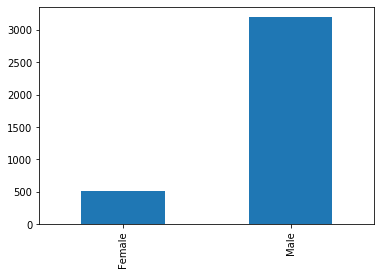

In [176]:
stage3FinalProcessedDF['Gender'].value_counts().sort_values().plot(kind = 'bar')

In [177]:
save_to_file(stage3FinalProcessedDF,saveFileToPath)

# End

# Testing Accuracy of trained model on SSA Data

In [178]:
# Load SSA
SSADatabaseLocation = 'SSAData.csv'


In [179]:
genderSSA = pd.read_csv(SSADatabaseLocation)

# Remove duplicate entries from SSA dataset
genderSSA = genderSSA.drop_duplicates(subset='FirstName')

genderSSA.head()

,FirstName,Gender
0,Emma,Female
1,Olivia,Female
2,Ava,Female
3,Isabella,Female
4,Sophia,Female


In [180]:
#nameGenderGuardianDF.loc[nameGenderGuardianDF['Gender'].isna(),'Gender'] = nameGenderGuardianDF['director_names'].apply(genderpredictor1)

genderSSA['PredictedGender'] = genderSSA.FirstName.apply(genderpredictor_decision_tree)

### Performance Metrics

In [181]:
labelSSAClass = ['Male','Female']

In [182]:
genderSSA['Correct'] = np.where((genderSSA['Gender'] == genderSSA['PredictedGender']),1,0)

# df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three']) , df['one'], np.nan)

In [183]:
AccuracyModelOnSSAData = genderSSA.Correct.value_counts()[1]/genderSSA.Correct.count()
print("Accuracy of the model on SSA Data is :",round((AccuracyModelOnSSAData*100),2),"%")

Accuracy of the model on SSA Data is : 89.4 %


In [184]:
SSA_cnf_matrix = confusion_matrix(genderSSA['Gender'], genderSSA['PredictedGender'] , labels= labelSSAClass )

Confusion matrix, without normalization
[[10634   831]
 [ 2294 15732]]


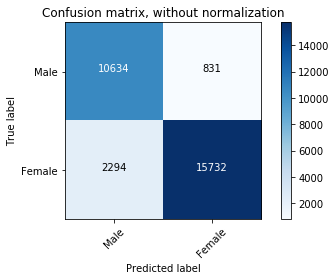

In [185]:
plot_confusion_matrix(SSA_cnf_matrix, classes= labelSSAClass,
                  title='Confusion matrix, without normalization')

In [186]:
print("\nClassification Report\n")
print(classification_report(genderSSA['Gender'], genderSSA['PredictedGender'], labels = labelSSAClass ))


Classification Report

              precision    recall  f1-score   support

        Male       0.82      0.93      0.87     11465
      Female       0.95      0.87      0.91     18026

    accuracy                           0.89     29491
   macro avg       0.89      0.90      0.89     29491
weighted avg       0.90      0.89      0.89     29491



## Testing Accuracy on Ground Truth  - Golden Sample data

### Prepare ground truth data for manual Analysis

In [187]:
manualGroundTruth = stage3FinalProcessedDF.copy()

In [188]:
print("Dataframe Shape before dropping : ",str(manualGroundTruth.shape))
manualGroundTruth.drop_duplicates(subset='director_ids',inplace = True)
print("Dataframe Shape after dropping : ",str(manualGroundTruth.shape))
manualGroundTruth.head()

Dataframe Shape before dropping :  (3708, 123)
Dataframe Shape after dropping :  (1651, 123)


,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names,FirstName,Gender,CareerStartYear,Career_Year_Number
3931,nm0000485,Fritz Lang,tt0017136,Metropolis (1927) - IMDb,418,263,98,8.3,114917,5 March 1927 (Denmark) See more »,...,1,0,0,8,7.93,fritz lang,fritz,Male,1919,9
10671,nm0000122,Charles Chaplin,tt0027977,Les temps modernes (1936) - IMDb,213,119,96,8.6,147990,24 September 1936 (France) See more »,...,0,0,0,4,8.30,charles chaplin,charles,Male,1914,23
13973,nm0281808,Victor Fleming,tt0032138,"Óz, a csodák csodája (1939) - IMDb",540,213,100,8.1,299644,21 March 1940 (Hungary) See more »,...,1,0,0,4,7.55,victor fleming,victor,Male,1919,21
13974,nm0002030,George Cukor,tt0032138,"Óz, a csodák csodája (1939) - IMDb",540,213,100,8.1,299644,21 March 1940 (Hungary) See more »,...,1,0,0,4,7.60,george cukor,george,Male,1930,10
16680,nm0003506,James Mangold,tt0035423,Kate & Leopold (2001) - IMDb,317,124,44,6.4,65765,25 December 2001 (USA) See more »,...,0,1,0,4,7.45,james mangold,james,Female,1995,7


In [189]:
manualGroundTruth = manualGroundTruth.reset_index(drop=True)

In [190]:
goldenSampleGroundTruth = manualGroundTruth.sample(n = 1000 , replace = False , random_state = 42)

In [191]:
goldenSampleGroundTruth = goldenSampleGroundTruth.filter(['director_ids', 'director_names','birthYear','deathYear','Gender'])

In [192]:
print("Dataframe Shape : ",str(goldenSampleGroundTruth.shape))
goldenSampleGroundTruth.head()

Dataframe Shape :  (1000, 4)


,director_ids,director_names,birthYear,Gender
482,nm0125336,Jez Butterworth,1969,Male
65,nm0001469,Barry Levinson,1942,Male
926,nm0856124,Eddy Terstall,1964,Female
481,nm0752328,Stefan Ruzowitzky,1961,Male
23,nm0000416,Terry Gilliam,1940,Male


In [193]:
# save_to_file(goldenSampleGroundTruth,saveFileToPath)

## Testing Accuracy

In [194]:
goldenSampleDF = pd.read_csv('golden_sample.csv')

In [195]:
goldenSampleDF.shape

(201, 6)

In [196]:
goldenSampleDF['predicted_gender'] = goldenSampleDF['director_ids'] 

In [197]:
goldenSampleDF['predicted_gender'] = goldenSampleDF['predicted_gender'].str.lower()
goldenSampleDF['true_gender'] = goldenSampleDF['true_gender'].str.lower()

In [198]:
goldenSampleDF.head()

,director_ids,director_names,birthYear,deathYear,predicted_gender,true_gender
0,nm0040872,Jimmy Atmaja,\N,\N,nm0040872,male
1,nm4172408,Ege Heckmann,\N,\N,nm4172408,male
2,nm0268327,Scott Farrell,\N,\N,nm0268327,male
3,nm2905618,Attila,1986,\N,nm2905618,male
4,nm6225087,Todd Darling,NaN,NaN,nm6225087,male


In [199]:
goldenSampleDirectorsList = goldenSampleDF['director_ids'].tolist()
len(goldenSampleDirectorsList)

201

In [200]:
# Extract the director_ids and their records from the original dataset where we classsified Gender
updatedGender_GoldenDirectorsDF = testAccuracyDF.loc[testAccuracyDF['director_ids'].isin(goldenSampleDirectorsList)].drop_duplicates(subset ="director_ids",keep = 'first')
updatedGender_GoldenDirectorsDF[['director_ids','Gender']].head(5)

,director_ids,Gender
11162,nm0724543,Female
24350,nm0848580,Male
25681,nm0460033,Male
28907,nm0795354,Male
32750,nm0070492,Male


In [201]:
# Prepare a dictionary containing the true gender of each director

dict_predicted_gender_for_director = updatedGender_GoldenDirectorsDF[['director_ids','Gender']]\
                                                    .set_index('director_ids')['Gender']\
                                                    .str.lower()\
                                                    .to_dict()
list(dict_predicted_gender_for_director)[:5]

['nm0724543', 'nm0848580', 'nm0460033', 'nm0795354', 'nm0070492']

In [202]:
# dfGenderlessData['Gender'] = dfGenderlessData['Gender'].transform(lambda x: dict_unique_gender[x] if x in dict_unique_gender else None )

In [203]:
goldenSampleDF['predicted_gender'] = goldenSampleDF['predicted_gender'].transform(lambda x: dict_predicted_gender_for_director[x] 
                                                                        if x in dict_predicted_gender_for_director else None )

In [204]:
goldenSampleDF.head()

,director_ids,director_names,birthYear,deathYear,predicted_gender,true_gender
0,nm0040872,Jimmy Atmaja,\N,\N,male,male
1,nm4172408,Ege Heckmann,\N,\N,male,male
2,nm0268327,Scott Farrell,\N,\N,male,male
3,nm2905618,Attila,1986,\N,female,male
4,nm6225087,Todd Darling,NaN,NaN,male,male


### Performance Metrics

In [205]:
labelGoldenClass = ['male','female']

In [206]:
goldenSampleDF['Correct'] = np.where((goldenSampleDF['predicted_gender'] == goldenSampleDF['true_gender']),1,0)
goldenSampleDF.head()
# df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three']) , df['one'], np.nan)

,director_ids,director_names,birthYear,deathYear,predicted_gender,true_gender,Correct
0,nm0040872,Jimmy Atmaja,\N,\N,male,male,1
1,nm4172408,Ege Heckmann,\N,\N,male,male,1
2,nm0268327,Scott Farrell,\N,\N,male,male,1
3,nm2905618,Attila,1986,\N,female,male,0
4,nm6225087,Todd Darling,NaN,NaN,male,male,1


In [207]:
AccuracyModelOnGoldenSampleData = goldenSampleDF['Correct'].value_counts()[1] / goldenSampleDF['Correct'].count()
print("Accuracy compared with the model on Golden sample Data is :",round((AccuracyModelOnGoldenSampleData*100),2),"%")

Accuracy compared with the model on Golden sample Data is : 91.04 %


In [208]:
golden_sample_cnf_matrix = confusion_matrix(goldenSampleDF['true_gender'], goldenSampleDF['predicted_gender'] , labels= labelGoldenClass )

Confusion matrix, without normalization
[[156  14]
 [  4  27]]


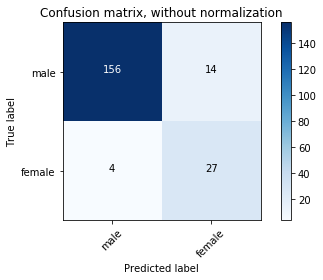

In [209]:
plot_confusion_matrix(golden_sample_cnf_matrix, classes= labelGoldenClass,
                  title='Confusion matrix, without normalization')

In [210]:
print("\nClassification Report\n")
print(classification_report(goldenSampleDF['true_gender'], goldenSampleDF['predicted_gender'], labels = labelGoldenClass ))


Classification Report

              precision    recall  f1-score   support

        male       0.97      0.92      0.95       170
      female       0.66      0.87      0.75        31

    accuracy                           0.91       201
   macro avg       0.82      0.89      0.85       201
weighted avg       0.93      0.91      0.92       201



# 3. Testing and comparing ML predicted gender with Genderize

In [211]:
from genderize import Genderize
import unicodedata

In [212]:
testGenderizeDF = stage3FinalProcessedDF.copy()

In [213]:
testGenderizeDF.head(2)

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,clean_director_names,FirstName,Gender,CareerStartYear,Career_Year_Number
3931,nm0000485,Fritz Lang,tt0017136,Metropolis (1927) - IMDb,418,263,98,8.3,114917,5 March 1927 (Denmark) See more »,...,1,0,0,8,7.93,fritz lang,fritz,Male,1919,9
10671,nm0000122,Charles Chaplin,tt0027977,Les temps modernes (1936) - IMDb,213,119,96,8.6,147990,24 September 1936 (France) See more »,...,0,0,0,4,8.30,charles chaplin,charles,Male,1914,23


In [214]:
unique_director_names = testGenderizeDF['FirstName'].sort_values().unique().tolist()
print('Length : ',len(unique_director_names))
unique_director_names[:5]

Length :  796


['aaron', 'abbas', 'abdellatif', 'abderrahmane', 'abrams']

In [215]:
gender_tuple_data = Genderize().get(unique_director_names)

In [216]:
genderizedAPIdf = pd.DataFrame(gender_tuple_data, columns =['name', 'gender', 'probability','count'])

In [217]:
genderizedAPIdf = genderizedAPIdf.rename(columns = {'name': 'FirstName','gender':'APIPredictGender'})

In [218]:
genderizedAPIdf.head(2)

,FirstName,APIPredictGender,probability,count
0,aaron,male,0.99,24633
1,abbas,male,0.97,6690


In [219]:
genderizedAPIdf.to_csv('Gender_Ready_Api_FirstName.csv')

### Names existing with dashes were not recoginized by the Genderize API and returned NaN. We fix it by filling NA values based on distribution of existing values.

Reference : https://stackoverflow.com/questions/44867219/pandas-filling-na-values-to-be-filled-based-on-distribution-of-existing-values

In [220]:
genderizedAPIdf['APIPredictGender'].value_counts( dropna= False)

male      632
female    149
NaN        15
Name: APIPredictGender, dtype: int64

In [221]:
normalizeRatioClass = genderizedAPIdf['APIPredictGender'].value_counts(normalize=True)
normalizeRatioClass

male      0.809219
female    0.190781
Name: APIPredictGender, dtype: float64

In [222]:
missingGenderizedAPI = genderizedAPIdf['APIPredictGender'].isnull()
missingGenderizedAPI.sum()

15

### Fill the Nan or null values with normalized proportion of the class.

In [223]:
# Fill the Nan or null values with normalized proportion of the class.
genderizedAPIdf.loc[missingGenderizedAPI,'APIPredictGender'] = np.random.choice(normalizeRatioClass.index, size=len(genderizedAPIdf[missingGenderizedAPI]),p=normalizeRatioClass.values)

In [224]:
genderizedAPIdf['APIPredictGender'].value_counts( dropna= False)

male      645
female    151
Name: APIPredictGender, dtype: int64

In [225]:
# Merge awards with movie_names data
print("\n Movie dataframe Shape Before merge with Genderized API data : ",str(testGenderizeDF.shape))
testGenderizeDF = testGenderizeDF.merge(genderizedAPIdf, on='FirstName', how ='left')
print("\n Movie dataframe Shape after merge with Genderized API data : ",str(testGenderizeDF.shape))


 Movie dataframe Shape Before merge with Genderized API data :  (3708, 123)

 Movie dataframe Shape after merge with Genderized API data :  (3708, 126)


In [226]:
testGenderizeDF['Gender'] = testGenderizeDF['Gender'].str.lower()
testGenderizeDF['APIPredictGender'] = testGenderizeDF['APIPredictGender'].str.lower()

In [227]:
testGenderizeDF['Correct'] = np.where((testGenderizeDF['Gender'] == testGenderizeDF['APIPredictGender']),1,0)

In [228]:
Accuracy_between_ML_and_API = testGenderizeDF['Correct'].value_counts()[1]/testGenderizeDF['Correct'].count()
print("Accuracy of the model between ML and Genderize API prediction :",round((Accuracy_between_ML_and_API*100),2),"%")

Accuracy of the model between ML and Genderize API prediction : 91.24 %


Before cleaning the data : Accuracy of the model between ML and Genderize API prediction : 88.03 %

In [229]:
labelGenderizeClass = ['male','female']

In [230]:
genderize_sample_cnf_matrix = confusion_matrix(testGenderizeDF['APIPredictGender'], testGenderizeDF['Gender'] , labels= labelGenderizeClass )

Confusion matrix, without normalization
[[3142  268]
 [  57  241]]


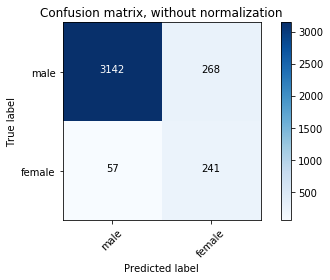

In [231]:
plot_confusion_matrix(genderize_sample_cnf_matrix, classes= labelGenderizeClass,
                  title='Confusion matrix, without normalization')

In [232]:
print("\nClassification Report\n")
print(classification_report(testGenderizeDF['APIPredictGender'], testGenderizeDF['Gender'], labels = labelGenderizeClass ))


Classification Report

              precision    recall  f1-score   support

        male       0.98      0.92      0.95      3410
      female       0.47      0.81      0.60       298

    accuracy                           0.91      3708
   macro avg       0.73      0.87      0.77      3708
weighted avg       0.94      0.91      0.92      3708



# Accuracy test END